## Clustering Introduction

In [82]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

'wget' is not recognized as an internal or external command,
operable program or batch file.


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
45,13.80,14.04,0.8794,5.376,3.155,1.560
160,12.54,13.67,0.8425,5.451,2.879,3.082
38,14.80,14.52,0.8823,5.656,3.288,3.112
48,14.79,14.52,0.8819,5.545,3.291,2.704
14,13.74,14.05,0.8744,5.482,3.114,2.932
69,12.73,13.75,0.8458,5.412,2.882,3.533
192,11.87,13.02,0.8795,5.132,2.953,3.597
1,14.88,14.57,0.8811,5.554,3.333,1.018
0,15.26,14.84,0.8710,5.763,3.312,2.221
70,17.63,15.98,0.8673,6.191,3.561,4.076


With 6 feature, its hard to visualize as six dimensions. So we'll use Principal Component Analysis (PCA) to analyze relationships between features, and summarize observations.

In [83]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so the are on same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

Let's visualize in a plot

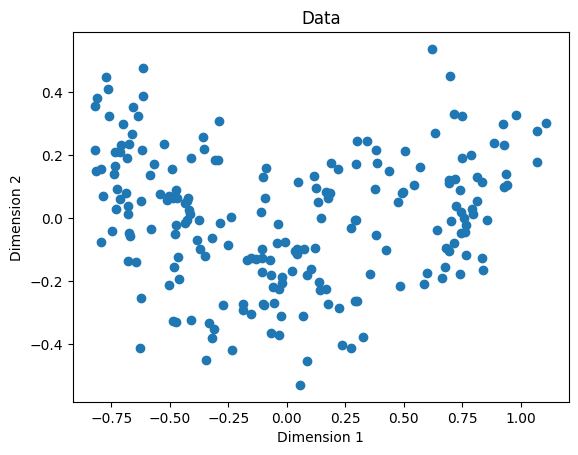

In [84]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Could start to see slight distinct groups of data points. But how to separate your data into clusters?

Could use a data sample to create a series of clustering models, incrementing in number of clusters. A job for `within cluster sum of squares` (WCSS), lower values = data points are closer, which you can plot them.

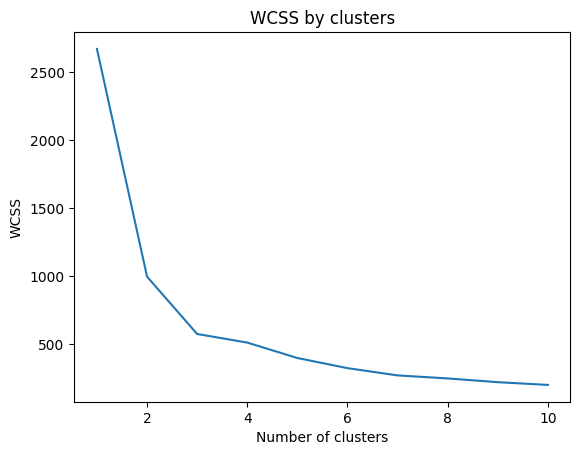

In [85]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)

# Plot the WCSS values onto a line graph
plt.plot(range(1,11),wcss)
plt.title('WCSS by clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Plot shows large reduction when clusters increase. Notable reduction is seen till cluster 3, but reduces significantly from then on. This is good indication that there are about 3 reasonably well separated clusters of data points.

## Clustering K-Means and Hierarchial

K-Means is commonly used to separate a dataset into K clusters of equal variance. The steps the model takes:

1. Set of K centroids are randomly chosen
2. Clusters formed by assigning the data points to their closest centroid
3. Mean of each cluster is computed, and centroid moves to mean
4. Repeat steps 2 and 3, until mean criteria is met

(note final results slightly differ, everytime a separate iteration is run. So sometimes it involves multiple attempts, to re-initialize centroids each time)

Let's try K-Means with value 3

In [86]:
# We'll be using the data we've already inputted from seeds
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's see it in 2D data points

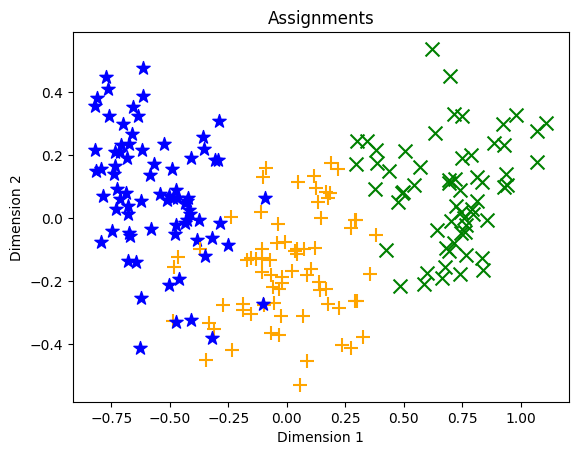

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

Why the use of clusters?

Sometimes you need to group the data into distincts clusters, knowing how many are there and what they indicate. Like types of customers in a coffee shop.

Or its a good initial step to creating a classification model, through identifying distinct points of data.

Our case is identifying seeds, and we have the y-data ready with the actual answers.

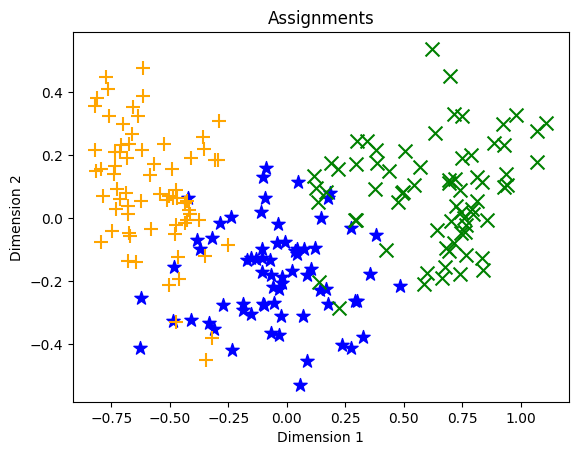

In [88]:
seed_species = data[data.columns[7]]
plot_clusters(features_2d, seed_species.values)

### Hierarchical Clustering

Hierarchical clustering method makes fewer distributional assumptions, though is less scalable than K-Means.

They create clusters by using either a divisive method or an agglomerative method. Divisive is a `top down` approach, starting with entire dataset and then finding partitions in a stepwise manner. Agglomerative clustering is `bottom up` approch.

We will work with agglomerative which goes as follows:
1. Linkage distances between each data points are computed
2. Points clustered pairwise with nearest neighbour
3. Linkage distance between clusters are computed
4. Clusters combined pairwise into larger clusters
5. Repeat steps 3 and 4 until all data points are in single cluster

Let's look at example of clustering in seed data

In [89]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(features.values)
agg_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

What do agglomerative clusters look like?

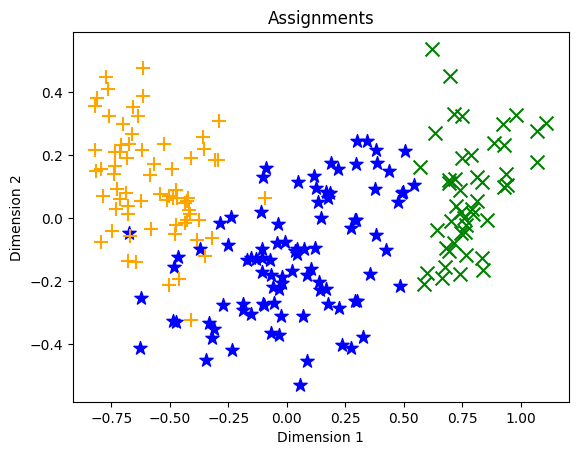

In [90]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, agg_clusters)


## Introducing TensorFlow using Keras

In [91]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
import gzip
import numpy as np

Let's famliarize ouselves with the data we'll be working on. the Fashion MNIST dataset, with over 70,000 grayscale images. 60k for training, 10k for testing. Images are 28x28 sqauares, and each pixel represents light value from 0 to 255. Wach image has a label, with integer 0 to 9 as classifiers of which clothing item it is.

Here is the following dictionary for classifiers.

In [92]:
labels_map = {
  0: 'T-Shirt',
  1: 'Trouser',
  2: 'Pullover',
  3: 'Dress',
  4: 'Coat',
  5: 'Sandal',
  6: 'Shirt',
  7: 'Sneaker',
  8: 'Bag',
  9: 'Ankle Boot',
}

Let's load in the dataset, and display sample of images with its labels.

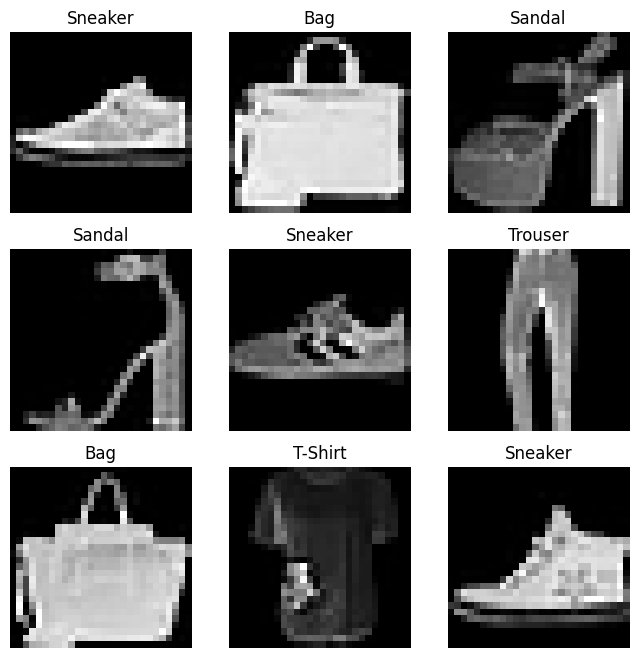

In [93]:
(training_images, training_labels),(test_images,test_labels) = tf.keras.datasets.fashion_mnist.load_data()

import random
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8,8))
cols=3
rows=3
for i in range(1, cols * rows + 1):
    sample_idx = random.randint(0, len(training_images))
    image = training_images[sample_idx]
    label = training_labels[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(image, cmap='gray')
plt.show()

In [94]:
training_labels[0]

np.uint8(9)

Labels looks like is from 0 to 9, and if checking our dictionary from before, this is supposed to be an `Ankle Boot`

In [95]:
training_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Image is comprised of pixel light values, from 0 to 255

We can use numpy arrays for training, but using tensors is much more efficient, and is essential on large datasets

In [96]:
train_dataset = tf.data.Dataset.from_tensor_slices((training_images, training_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

Our image is 0 to 255. Not ideal for ML, since they like to deal with values between 0 to 1. So we'll scale it from 0 min, to 1 max, by dividing it by 255.

In [97]:
train_dataset = train_dataset.map(lambda image, label: (float(image)/255.0,label))
test_dataset = test_dataset.map(lambda image, label: (float(image)/255.0,label))

In [98]:
train_dataset.as_numpy_iterator().next()[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Now pixel values in decimals between 0 and 1.

Since it aint numpy array anynmore, iterations is done with `as_numpy_iterator`, and advancing it is by calling `next` method

Let's tell dataset to give us batches of 64, and shuffle data

In [99]:
batch_size = 64
train_dataset = train_dataset.batch(batch_size).shuffle(500)
test_dataset = test_dataset.batch(batch_size).shuffle(500)

this tells model that we don't wanna iterate one result, but a batch of 64. We can print length to double check.

In [100]:
len(train_dataset.as_numpy_iterator().next()[0])

64

In [101]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf

Our goal: ML model has an input matrix shape of (28,28) and an outpout of vector size 10. The largest value in output will be the class of clothing for the image.


Here's a visual of neural network structure:

![alt text](download.png)

In [107]:
class NeuralNetwork(tf.keras.Model):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.sequence = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(10)
    ])

  def call(self, x: tf.Tensor) -> tf.Tensor:
    y_prime = self.sequence(x)
    return y_prime

ReLU is used to add non-linearity. Having only linear layers would mathematically make everything one layer. Non-linear gives more expressive power, and allows discoverability of non-linear relationships between data.

In [103]:
model = NeuralNetwork()
model.build((1,28,28))
model.summary()

C:\Users\deanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "neural_network_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ (None, 10)             │        15,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

Our model needs 784 nodes (28 x 28), one hidden layer with 20 nodes, and ReLU activation function. We want output network be a vector size 10 for the 10 clothing categories

![alt text](download-1.png)

Lotta info here, so we'll expand upon it:

`W` weights are added to connections between layers, and bias `B` as input to dense layers. W and B are parameters, where adjusting is made to get as close to correct we can to true labels.

Loss is used to judge accuracy, and it takes outputs of y-prediction to y-true, measures the difference and combines it to a singular output. High loss = more different, Low loss = accurate predictions. Our problem is on predicting categories, we will use `SparseCategoricalCrossentropy`

In [108]:
learning_rate = 0.1
batch_size= 64

model = NeuralNetwork()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model.compile(optimizer, loss_fn, metrics)

`from_logits = True` is passed in loss function for categorical cross-entropy. It requires distribution import, with all distributed values added to the value of 1. We need this normalization, or else there is no upper/lower bound to the distribution value.

`batch_size` is specified to 64. Its important as the model trains by each singular step. If it trains on one image on each step, it would be inefficient. One step for all training images would not provied enough information for it to learn patterns. So you find a middle point between time efficiency, but still being able to pick up pixel nuances. 

We will call`fit` on model and train it with 5 epochs.

In [110]:
model = NeuralNetwork()
model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)
model.fit(train_dataset, epochs=5)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6969 - loss: 0.8647
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8318 - loss: 0.4787
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8436 - loss: 0.4328
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8551 - loss: 0.4033
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8629 - loss: 0.3875


In [111]:
(test_loss, test_accuracy) = model.evaluate(test_dataset)
print(f'\nTest accuracy: {test_accuracy * 100:>0.1f}%, test loss: {test_loss:>8f}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8458 - loss: 0.4217

Test accuracy: 84.7%, test loss: 0.428414


### Makikng a Prediction

In [113]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import numpy as np
import tensorflow as tf
import requests
from PIL import Image
import matplotlib.pyplot as plt

Since model has done training and has good accuracy, we can move onto classifying images that the model has not seen before

We will get an image for first prediction use

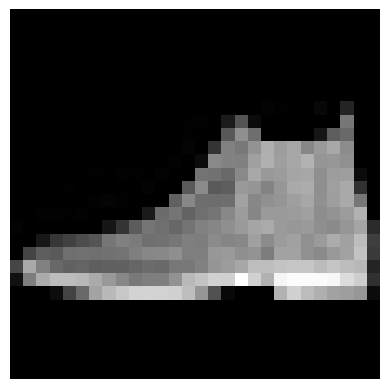

In [114]:
url = 'https://raw.githubusercontent.com/MicrosoftDocs/tensorflow-learning-path/main/intro-keras/predict-image.png'

with Image.open(requests.get(url, stream=True).raw) as image:
  X = np.asarray(image, dtype=np.float32).reshape((-1, 28, 28)) / 255.0

plt.figure()
plt.axis('off')
plt.imshow(X.squeeze(), cmap='gray')
plt.show()

We have a picture of an ankle boot. Let's call `predict` to get class index prediction.

In [120]:
predicted_vector=model.predict(X)
predicted_index=np.argmax(predicted_vector)
predicted_name=labels_map[predicted_index]

print(f'Predicted class: {predicted_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class: Ankle Boot


In [124]:
probs = tf.nn.softmax(predicted_vector.reshape((-1,)))
for i,p in enumerate(probs):
    print(f'{labels_map[i]} -> {p:.3f}')

T-Shirt -> 0.000
Trouser -> 0.000
Pullover -> 0.000
Dress -> 0.000
Coat -> 0.000
Sandal -> 0.036
Shirt -> 0.000
Sneaker -> 0.151
Bag -> 0.007
Ankle Boot -> 0.805


## Introduction to image data

Computer vision can solve a multitude of problems:
**Image Classification**: Classifying images based on pre-defined categories. E.g. whether the picture is of a cat or dog.
**Object Detection**: Finding the known items in the picture and localizing them, E.g. a bounding box around the recognized objects.
**Segmentation**: Similar to object detection. Rather than bounding box, we return objects on maps outlining each revognize objects.

![alt text](mFBCV.png)

Starting on MNIST data.

To work with colours over grayscale like MNIST, we need 3 intensity values representing Red, Green and Blue. 

Multi-dimensional arrays are also called tensors. The extra dimensions help due to storing of sequence of images.

In [125]:
#Import the packages needed.
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

# In this tutorial, we will train heaps of model, and use a lot of GPU. Will need to utilize recources conservatively, and tensorflow has an option to grow GPU memory allocation when needed
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices)>0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(tf.__version__)

2.18.0


We will use another mnist data, and load it in

In [129]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


let's visualize the digits

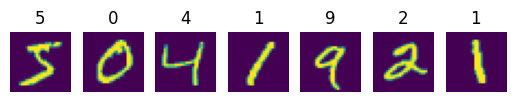

In [130]:
fig,ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(x_train[i])
    ax[i].set_title(y_train[i])
    ax[i].axis('off')

In [132]:
print('Training samples:',len(x_train))
print('Test samples:',len(x_test))

print('Tensor size:',x_train[0].shape)
print('First 10 digits are:',y_train[:10])
print('Type of data is',type(x_train))

Training samples: 60000
Test samples: 10000
Tensor size: (28, 28)
First 10 digits are: [5 0 4 1 9 2 1 3 1 4]
Type of data is <class 'numpy.ndarray'>


With numpy array allows manipulation with any numpy operations. Images are also represented from 0 to 255 like the gray scale clothings

In [136]:
print(x_train.min())
print(x_train.max())

0
255


Now convert it to values that are friendly to computers, aka values between 0 to 1

In [138]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

### Training on dense neural network

We will start with fully connected neural network to help identify the handwritten numbers.

In [139]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28,28)), 
        keras.layers.Dense(10,activation='softmax')])
model.summary()

C:\Users\deanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

With the number of parameters (7850), how we get the number is: 

28*28 = 784 > the number of pixels in an image, which flattened into one-dimension becomes 784

784*10 = 7840 > each of the 10 neurons on the next layer, is connected to all 784 neurones from the layer before

7840+10 = 7850 > the last 10 represents the bias term, allowing the model to state the likelihood of an image being in which category

In [140]:
model.layers[1].weights

[<Variable path=sequential_12/dense_24/kernel, shape=(784, 10), dtype=float32, value=[[-0.03656942 -0.06941501 -0.03167649 ... -0.034479    0.06527372
   -0.03577616]
  [-0.06814002 -0.00386357  0.07443125 ...  0.06712616  0.01114689
   -0.00032823]
  [ 0.06664244 -0.07590786 -0.06428491 ... -0.04572102  0.04781873
   -0.04876897]
  ...
  [ 0.01320699 -0.0567215  -0.03738264 ...  0.07852157  0.0160989
    0.04269706]
  [-0.02909917 -0.04966917  0.06431711 ... -0.0085618  -0.06529625
    0.07477891]
  [ 0.04347298  0.00377592 -0.04691445 ...  0.02578416  0.05768607
   -0.04227486]]>,
 <Variable path=sequential_12/dense_24/bias, shape=(10,), dtype=float32, value=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]>]

A network can take any digit and give probability of which digit it would likely be

In [141]:
print('Digit to be predicted: ',y_train[0])
model(np.expand_dims(x_train[0],0))

Digit to be predicted:  5


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.05026989, 0.04513062, 0.24472293, 0.10991994, 0.06075618,
        0.0991348 , 0.09226086, 0.05324677, 0.12671223, 0.11784578]],
      dtype=float32)>

We see the model is providing similar probabilities across all digits, mostly since it hasn't been trained to recognize patterns yet. We will need to compile it first

In [142]:
model.compile(optimizer='sgd',loss='categorical_crossentropy')

There are two other important things to models:

**optimizer** - used to minimize errors
**loss function** - output to obtain how big/small errors are

With training, we need to provide output probability of all 10 digits, and also use **one-hot encoding**, where each category is contained in it's own position. Aka 5 will be (0, 0, 0, 0, 0, 1, 0, 0, 0, 0)

In [144]:
y_train_onehot = keras.utils.to_categorical(y_train)
y_test_onehot = keras.utils.to_categorical(y_test)
print("First 3 training labels:",y_train[:3])
print("One-hot-encoded version:\n",y_train_onehot[:3])

First 3 training labels: [5 0 4]
One-hot-encoded version:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


let's fit the training data onto model

In [145]:
model.fit(x_train,y_train_onehot)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.1535


While training, it's alao important to see how the model generalizes through data it hasn't been trained before, aka our validation dataset to evalute the error.

In [146]:
hist = model.fit(x_train,y_train_onehot,validation_data=(x_test,y_test_onehot), epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4755 - val_loss: 0.4019
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4172 - val_loss: 0.3698
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3870 - val_loss: 0.3501


We can attach a variable from fit, to visualize the change in loss by epoch

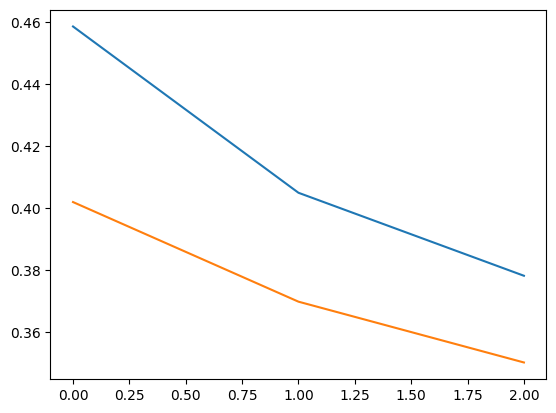

In [148]:
for x in ['loss','val_loss']:
    plt.plot(hist.history[x])

Loss value is hard to gauge the model's accuracy. Measuring the percentage of correctly classified digits from the test dataset would be ideal. We can add that to the **metrics** during dataset compilation.

In [150]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['acc'])
hist = model.fit(x_train,y_train_onehot,validation_data=(x_test,y_test_onehot), epochs=3,batch_size=128)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9000 - loss: 0.3649 - val_acc: 0.9074 - val_loss: 0.3461
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9007 - loss: 0.3629 - val_acc: 0.9068 - val_loss: 0.3430
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9005 - loss: 0.3593 - val_acc: 0.9074 - val_loss: 0.3397


We used `sgd` as an optimizer. Let's try a variation called `momentum SGD`, where the idea is the gradient of loss function will be averaged over the last few steps to keep momentum. 

In [152]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,activation='softmax')])

model.compile(optimizer=keras.optimizers.SGD(momentum=0.5),loss='categorical_crossentropy',metrics=['acc'])
hist = model.fit(x_train,y_train_onehot,validation_data=(x_test,y_test_onehot), epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.7256 - loss: 1.1158 - val_acc: 0.8837 - val_loss: 0.4757
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8764 - loss: 0.4747 - val_acc: 0.8967 - val_loss: 0.3978
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8903 - loss: 0.4082 - val_acc: 0.9037 - val_loss: 0.3654
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8970 - loss: 0.3783 - val_acc: 0.9056 - val_loss: 0.3475
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8996 - loss: 0.3657 - val_acc: 0.9087 - val_loss: 0.3346


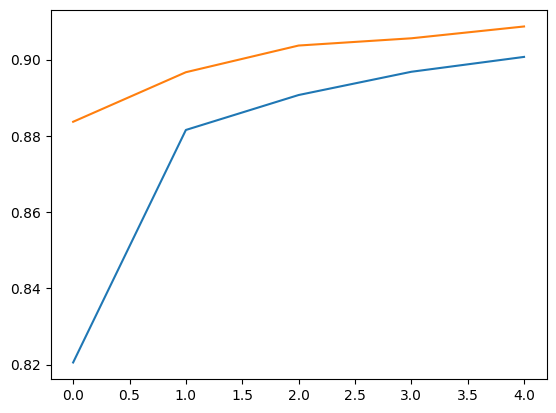

In [153]:
for x in ['acc','val_acc']:
    plt.plot(hist.history[x])

### Visualizing network weights

Let's visualize weights of our neural network and see what they look like. Our digit classifying model is one-layered perceptron, aka multiplying the initial image's flattened state by a unique weight matrix. This gives each image pixel it's own weight, and makes it much easier for us to visualize the weight. For models with multiple layers, this becomes much more difficult to visuazlize.

We will create `weight_tensor` with a dimension of 784*10. This tensor can be obtained by calling the `net.parameters()` method. For our example, we want to see if the number is 0 or not. So we'd multiply the input digit with `weight_tensot[0]`, then pass through softmax normalization to get answer. Resulting weight tensor usually ands up with an average shape of the digit its supposed to represent.

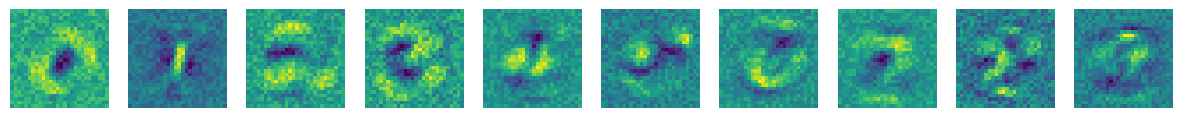

In [154]:
weight_tensor = model.layers[1].weights[0].numpy().reshape(28,28,10)
fig,ax = plt.subplots(1,10,figsize=(15,4))
for i in range(10):
    ax[i].imshow(weight_tensor[:,:,i])
    ax[i].axis('off')

### Multilayer Networks

Now let's try creating a model with more than just one layer, aka our **hidden layers**. 

These extra hidden layers can contain any amount of neurons, and will affect how powerful the neural network becomes (aka their parameters). The more parameters there are in the network, the more time the model needs to train. But more neurons don't always mean its better. Parameter size should be chosen depending on dataset size to prevent overfitting.

One **important** factor is non-linear activation function inclusion like **ReLU**. They are great for model reasoning and achieving high expressive power. With only linear layers, it's equivalent to just one linear layer and give little variation.

Here's two of the most frequently used activations functions:

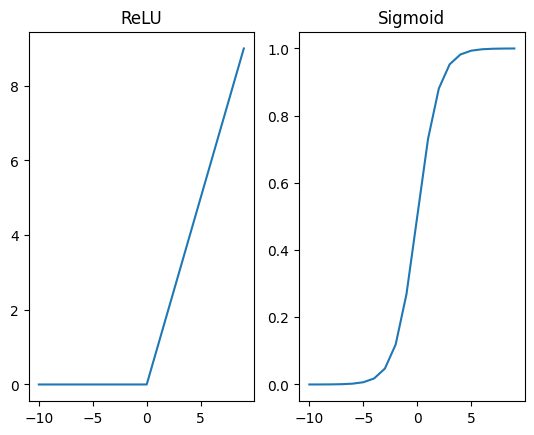

In [155]:
def plot_function(f,name=''):
    plt.plot(range(-10,10), [f(tf.constant(x,dtype=tf.float32)) for x in range(-10,10)])
    plt.title(name)

plt.subplot(121)
plot_function(tf.nn.relu,'ReLU')
plt.subplot(122)
plot_function(tf.nn.sigmoid,'Sigmoid')

We will modify the approach by initializing the `model` object first, and adding layers one by one:

In [156]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100)) # 784 inputs, 100 outputs
model.add(keras.layers.ReLU()) # Activation function
model.add(keras.layers.Dense(10)) # 100 inputs, 10 outputs

model.summary()

C:\Users\deanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

### Sparse Categorical Crossentropy with Softmax

With our conversion of y_data into one-hot encoding, it uses a lot of extra memory which is inefficient and costly. We can redefine the loss function so that it will expect the **number of class**, instead of corresponding one-hot vector. This loss function is called **sparse categorical cross-entropy**.

In [157]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

In [158]:
hist = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8775 - loss: 0.4438 - val_acc: 0.9553 - val_loss: 0.1548
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9570 - loss: 0.1476 - val_acc: 0.9695 - val_loss: 0.1108
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9718 - loss: 0.0989 - val_acc: 0.9707 - val_loss: 0.0977
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9771 - loss: 0.0758 - val_acc: 0.9736 - val_loss: 0.0897
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9815 - loss: 0.0637 - val_acc: 0.9747 - val_loss: 0.0860


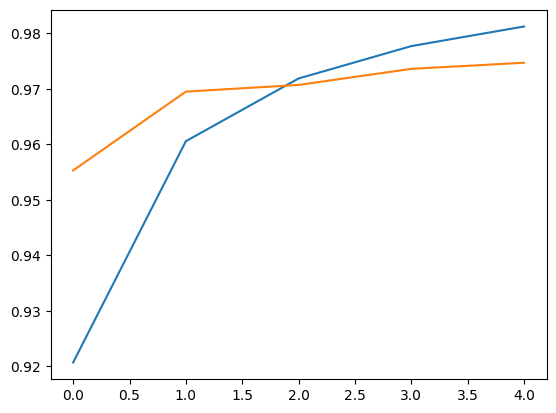

In [159]:
for x in ['acc','val_acc']:
    plt.plot(hist.history[x])

#### Note:

The more expressive model with hidden layers has certainly outperformed the old one layered perceptron. With almost 100% accuracy, training longer with more neurons could certainly let us reach really close to this goal.

However it's also very important to understand the concept **overfitting**. Even if training is at 100%, our test data will not match that, and could be observed to fall in accuracy, mostly due to the model learning individual patterns that aren't in the generalized dataset, and more so result in copying the answers of training data.

You can reduce overfitting by making the model less powerful/decreasing number of parameters, increase training samples, or stop training as soon as validation accuracy starts to fall.

model consits of layers with function names in them. We can make these definitions shorter, by specifying the activation function that follows the layer right inside the layer definition:

In [161]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation=None))

model.summary()

C:\Users\deanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

## Convolutional neural networks

We learned to define a generic multi-layered neural network, now we'll learn **Convolutional Neural Networks (CNNs)**, which are specifically designed for computer vision.

An example of CNN computer vision use, is identifying specific patterns, and their parts that make up a specific object. For example a cat, where the model identifies the horizontal lines of the long whiskers, connected to the head, etc.

We'll use **convolutional filters** to extract patterns. We will also use `tfcv`, a helper library with useful functions that we don't have to recreate in this workbook

In [184]:
# TensorFlow Computer Vision Helper

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os

def plot_convolution(data,t,title=''):
    fig, ax = plt.subplots(2,len(data)+1,figsize=(8,3))
    fig.suptitle(title,fontsize=16)
    tt = np.expand_dims(np.expand_dims(t,2),2)
    for i,im in enumerate(data):
        ax[0][i].imshow(im)
        ximg = np.expand_dims(np.expand_dims(im,2),0)
        cim = tf.nn.conv2d(ximg,tt,1,'SAME')
        ax[1][i].imshow(cim[0][:,:,0])
        ax[0][i].axis('off')
        ax[1][i].axis('off')
    ax[0,-1].imshow(t)
    ax[0,-1].axis('off')
    ax[1,-1].axis('off')
    #plt.tight_layout()
    plt.show()

def plot_results(hist):
    fig,ax = plt.subplots(1,2,figsize=(15,3))
    ax[0].set_title('Accuracy')
    ax[1].set_title('Loss')
    for x in ['acc','val_acc']:
        ax[0].plot(hist.history[x])
    for x in ['loss','val_loss']:
        ax[1].plot(hist.history[x])
    plt.show()

def display_dataset(dataset, labels=None, n=10, classes=None):
    fig,ax = plt.subplots(1,n,figsize=(15,3))
    for i in range(n):
        ax[i].imshow(dataset[i])
        ax[i].axis('off')
        if classes is not None and labels is not None:
            ax[i].set_title(classes[labels[i][0]])

def check_image(fn):
    try:
        im = Image.open(fn)
        im.verify()
        return im.format=='JPEG'
    except:
        return False
    
def check_image_dir(path):
    for fn in glob.glob(path):
        if not check_image(fn):
            print("Corrupt image or wrong format: {}".format(fn))
            os.remove(fn)

def load_cats_dogs_dataset(batch_size=64):
    if not os.path.exists('data/PetImages'):
        print("Extracting the dataset")
        with zipfile.ZipFile('data/kagglecatsanddogs_3367a.zip', 'r') as zip_ref:
            zip_ref.extractall('data')
    print("Checking dataset")
    check_image_dir('data/PetImages/Cat/*.jpg')
    check_image_dir('data/PetImages/Dog/*.jpg')
    data_dir = 'data/PetImages'
    print("Loading dataset")
    ds_train = keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split = 0.2,
        subset = 'training',
        seed = 13,
        image_size = (224,224),
        batch_size = batch_size
    )
    ds_test = keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split = 0.2,
        subset = 'validation',
        seed = 13,
        image_size = (224,224),
        batch_size = batch_size
    )
    return ds_train,ds_test


Can't even add the tfcv.py file into this dumbass workbook, so just copied the code's entirety and store it inside here.

### Convolutional filters

Convolutional filters are small windows that run over each pixel of the image, and compute weighted average of the neighbouring pixels.

They are defined by a matrices of weight coefficients. Let's see examples of it:

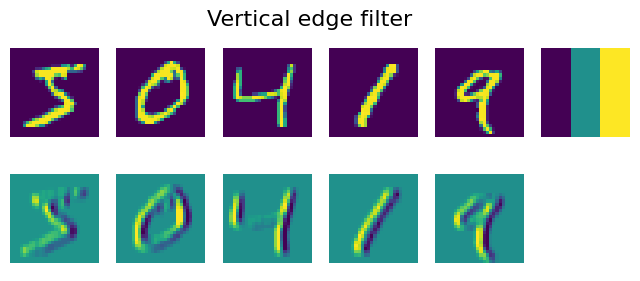

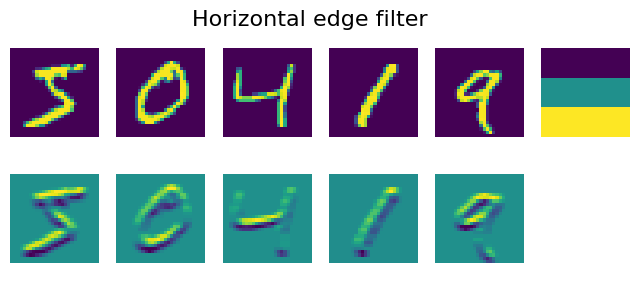

In [185]:
plot_convolution(x_train[:5],[[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]],'Vertical edge filter')
plot_convolution(x_train[:5],[[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]],'Horizontal edge filter')

When the filter passes through uniform pixel fields, it produces values of 0. But when it encounters edges in the image, a spiked value is generated, which is reflective by the colour output.

Multiple filters are applied to generate such features, and these are used for ML algorithm to build a classifier. These deep learning models can construct network that learn the best convolutional filters to solve classification problems on its own.

Convolutional layers are defined as: `Conv2d` class, specifying the following:

* `filters` - number of filters to use. Using 9 different filters, giving model the opportunity to explore the filters that work best
* `kernel_size` - size of the sliding window, usually 3x3 to 5x5 area/filters are used on the image.

What is the number of parameters if it has only one convolutional layer? Input image is 28x28, we would also apply the 9 filters with kernel size of 5x5, we end up with 24x24x9. 24 > due to the sliding window being 5x5, there is a total of 24 possible positions the sliding window can go on a 28x28 image in one direction. The 9 is for the total number of unique filters for every possible position of the sliding window.

Flattening it out results 5184, then multiplying then adding the 10 output results.

In [186]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=9, kernel_size=(5,5), input_shape=(28,28,1),activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

model.summary()

C:\Users\deanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 9)      │           234 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │        51,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,084 (203.45 KB)

 Trainable params: 52,084 (203.45 KB)

 Non-trainable params: 0 (0.00 B)

Convolutional layers are often better generalizers, able to achieve it with smaller datasets. (50k parameters, compared to the 80k fully-connected multi-layered network)

We'll reshape the data, as the convolutional layers are in 3-dim.

In [187]:
x_train_c = np.expand_dims(x_train,3)
x_test_c = np.expand_dims(x_test,3)
hist = model.fit(x_train_c,y_train,validation_data=(x_test_c,y_test),epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9044 - loss: 0.3370 - val_acc: 0.9741 - val_loss: 0.0827
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9764 - loss: 0.0818 - val_acc: 0.9800 - val_loss: 0.0642
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9828 - loss: 0.0596 - val_acc: 0.9835 - val_loss: 0.0521


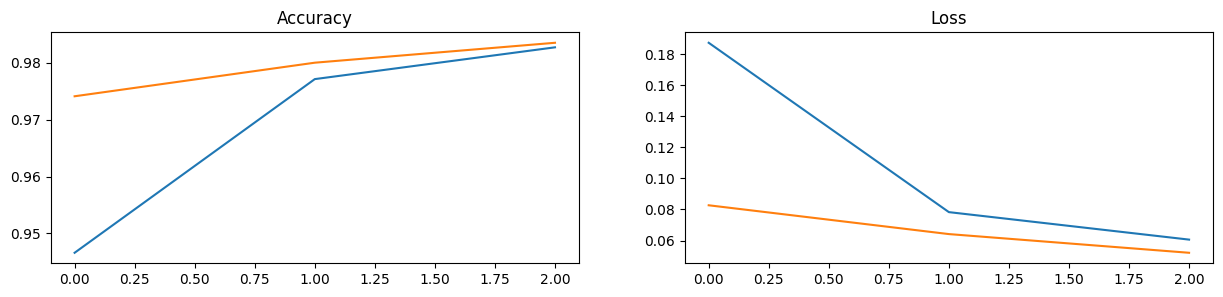

In [188]:
plot_results(hist)

Let's visualize the 9 weights of our trained convolutional layers, and understand whats going on.

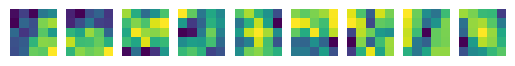

In [189]:
fig,ax = plt.subplots(1,9)
l = model.layers[0].weights[0]
for i in range(9):
    ax[i].imshow(l[...,0,i])
    ax[i].axis('off')

### Multi-layered CNNs and pooling layers

First convolutional layers look for primitive layers, such as horizontal or vertical lines, then the layers further down look for smaller details, such as shapes, or stroke shapes etc. All layers can coombine these shapes into parts of a picture, all the way to the final object.

To save resources, we can reduce spatial size of an image using **pooling layers**.

* **Average Pooling** takes a sliding window/area, say 2x2 square, and then compute the average values within this window
* **Max Pooling** Replacing the window with the maximum value. The idea of it is detecting the presence of patterns in the sliding window

This architecture is called **pyramix architecture** because of decreasing spatial dimensions and increasing feature/filters dimensions

In [190]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=10, kernel_size=(5,5), input_shape=(28,28,1),activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=20, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(),    
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

model.summary()

C:\Users\deanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         3,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,490 (33.16 KB)

 Trainable params: 8,490 (33.16 KB)

 Non-trainable params: 0 (0.00 B)

In [191]:
hist = model.fit(x_train_c,y_train,validation_data=(x_test_c,y_test),epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.8725 - loss: 0.4389 - val_acc: 0.9762 - val_loss: 0.0698
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9762 - loss: 0.0769 - val_acc: 0.9855 - val_loss: 0.0474
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9835 - loss: 0.0532 - val_acc: 0.9863 - val_loss: 0.0398


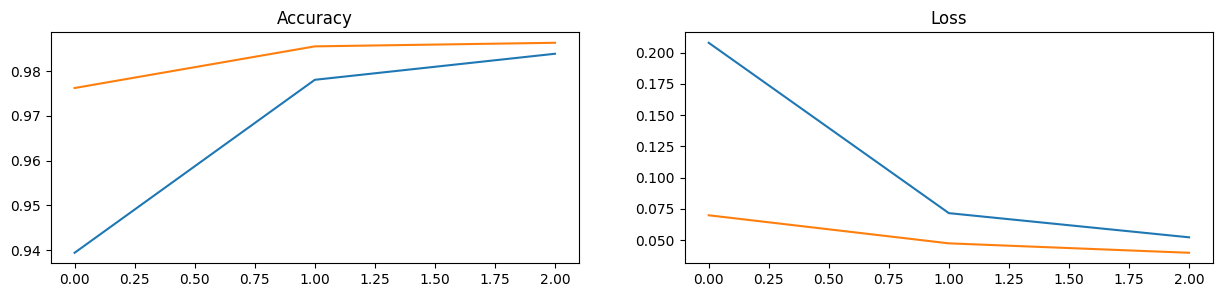

In [192]:
plot_results(hist)

We can certainly get closer with another layer of reduced sized neurons.

After our handwritten model, let's try it on picture datasets of different objects called `CIFAR-10`, containing 60k 32x32 images, divided into 10 classes

In [195]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


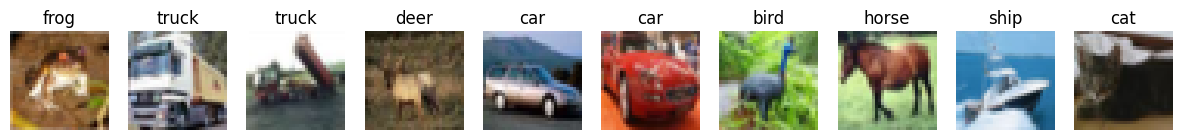

In [196]:
display_dataset(x_train,y_train,classes=classes)

Architecture we'll be using for this is called `LeNet`. Follows the same principles as what we've done, but having 3 input colour channel (RGB) over 1 channel (Grayscale)

In [197]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,3)),
    keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
    keras.layers.Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation = 'relu'),
    keras.layers.Dense(84, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')])

model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [198]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.3326 - loss: 1.8138 - val_acc: 0.4928 - val_loss: 1.4041
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.5082 - loss: 1.3661 - val_acc: 0.5448 - val_loss: 1.2634
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.5584 - loss: 1.2333 - val_acc: 0.5731 - val_loss: 1.1970
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.5882 - loss: 1.1526 - val_acc: 0.5698 - val_loss: 1.2231
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.6089 - loss: 1.0926 - val_acc: 0.5829 - val_loss: 1.1728
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.6304 - loss: 1.0400 - val_acc: 0.6091 - val_loss: 1.0985
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.6519 - loss: 0.9783 - val_acc: 0.5820 - val_loss: 1.2169
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.6617 - loss: 0.9486 - val_acc: 0.5996 - val_loss: 1.1457
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━

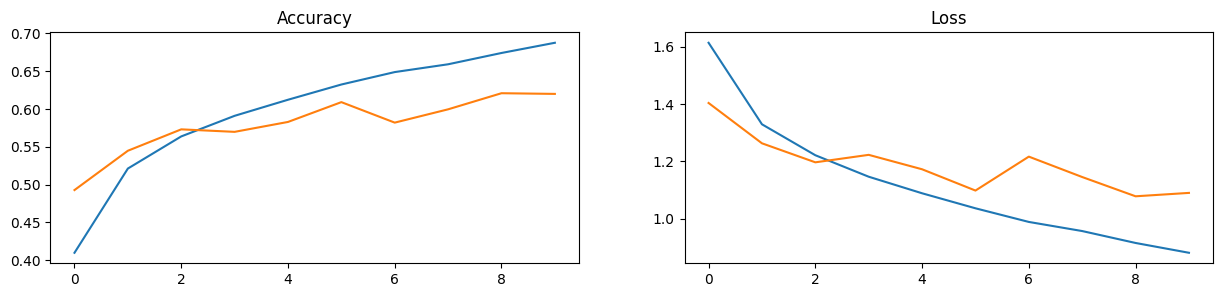

In [199]:
plot_results(hist)

Accuracy isn't that high after 10 epochs, but given how difficult CIFAR-10 is and in colour, 60% is already goof in such short training time.

### Transfer learning/pre-trained models

Next learning is of transfer learning,where we transfer the knowledge of pre-existing neural network model to another. Such as models that have learned against large image datasets. They already do a good job, and allow us to build classifiers on top of the extracted features quickly.

For now, we will solve a real-life problem of classifying images of cats and dogs using the `Kaggle Cats vs. Dogs Dataset`.

In [205]:
import zipfile
if not os.path.exists('data/PetImages'):
    with zipfile.ZipFile('data/kagglecatsanddogs_5340.zip', 'r') as zip_ref:
        zip_ref.extractall('data')

In [206]:
check_image_dir('data/PetImages/Cat/*.jpg')
check_image_dir('data/PetImages/Dog/*.jpg')

Corrupt image or wrong format: data/PetImages/Cat\10073.jpg
Corrupt image or wrong format: data/PetImages/Cat\10125.jpg
Corrupt image or wrong format: data/PetImages/Cat\10404.jpg
Corrupt image or wrong format: data/PetImages/Cat\10501.jpg
Corrupt image or wrong format: data/PetImages/Cat\10820.jpg
Corrupt image or wrong format: data/PetImages/Cat\10874.jpg
Corrupt image or wrong format: data/PetImages/Cat\11083.jpg
Corrupt image or wrong format: data/PetImages/Cat\11086.jpg
Corrupt image or wrong format: data/PetImages/Cat\11095.jpg
Corrupt image or wrong format: data/PetImages/Cat\11210.jpg
Corrupt image or wrong format: data/PetImages/Cat\11397.jpg
Corrupt image or wrong format: data/PetImages/Cat\1151.jpg
Corrupt image or wrong format: data/PetImages/Cat\11565.jpg
Corrupt image or wrong format: data/PetImages/Cat\11729.jpg
Corrupt image or wrong format: data/PetImages/Cat\11864.jpg
Corrupt image or wrong format: data/PetImages/Cat\11874.jpg
Corrupt image or wrong format: data/PetIm

C:\Users\deanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Corrupt image or wrong format: data/PetImages/Dog\9145.jpg
Corrupt image or wrong format: data/PetImages/Dog\9188.jpg
Corrupt image or wrong format: data/PetImages/Dog\9367.jpg
Corrupt image or wrong format: data/PetImages/Dog\9414.jpg
Corrupt image or wrong format: data/PetImages/Dog\9500.jpg
Corrupt image or wrong format: data/PetImages/Dog\9556.jpg
Corrupt image or wrong format: data/PetImages/Dog\9640.jpg
Corrupt image or wrong format: data/PetImages/Dog\9643.jpg
Corrupt image or wrong format: data/PetImages/Dog\9851.jpg
Corrupt image or wrong format: data/PetImages/Dog\9961.jpg
Corrupt image or wrong format: data/PetImages/Dog\9967.jpg


When loading datasets that are big like images, we can't do all since we would run out of memory. What datasets do is often represented as generators that can return data in minibatches for trainings.

Keras includes a helper function image_dataset_from_directory, which can load images from subdirectories corresponding to different classes. This function takes care of scaling images, and it can split dataset into train and test subsets:

In [207]:
data_dir = 'data/PetImages'
batch_size = 32
ds_train = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 13,
    image_size = (224,224),
    batch_size = batch_size
)
ds_test = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 13,
    image_size = (224,224),
    batch_size = batch_size
)

Found 24769 files belonging to 2 classes.
Using 19816 files for training.
Found 24769 files belonging to 2 classes.
Using 4953 files for validation.


In [208]:
ds_train.class_names

['Cat', 'Dog']

The model is ready for fitting, and can be trained by the following looping code:

Training batch shape: features=(32, 224, 224, 3), labels=(32,)


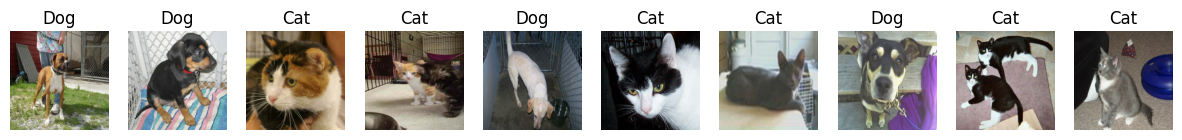

In [209]:
for x,y in ds_train:
    print(f"Training batch shape: features={x.shape}, labels={y.shape}")
    x_sample, y_sample=x,y
    break

display_dataset(x_sample.numpy().astype(np.uint8),np.expand_dims(y_sample,1),classes=ds_train.class_names)

### Pre-trained models

We can find pre-trained models under the `keras.applications` namespace, and more through web search. We'll try out one simpler form called `VGG-16`.

In [214]:
vgg = tf.keras.applications.VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 45s 0us/step


In [215]:
inp = keras.applications.vgg16.preprocess_input(x_sample[:1])

res = vgg(inp)
print(f"Most probable class = {tf.argmax(res,1)}")

keras.applications.vgg16.decode_predictions(res.numpy())

Most probable class = [242]
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n02108089', 'boxer', np.float32(0.9962603)),
  ('n02089867', 'Walker_hound', np.float32(0.0011975828)),
  ('n02093428', 'American_Staffordshire_terrier', np.float32(0.0005384848)),
  ('n02087394', 'Rhodesian_ridgeback', np.float32(0.00047890452)),
  ('n02089973', 'English_foxhound', np.float32(0.0003616092))]]

Some important notes:

* For pre-trained models, there may need a `preprocess_input` function, as the model might have been trained on data that has been manipulated in a way, e.g. normalization etc.
* Neural network is then applied to input batch, recieving 1000 resulting elements that show probability of classes
* Results are `ImageNet` classes, which will need to use `decode_predictions` function to understand it. This returns the top n classes with the names together

In [216]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Deep neural networks require lots of computational power, so it's important to use GPU acceleration wherever is possible. We can check if TensorFlow is able to use GPU using this code:

In [217]:
tf.config.list_physical_devices('GPU')

[]

We want VGG-16 to extract features from our images, also we need the model without the final classification layers. We can instantiate VGG-16 model without top layers using this code:

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Shape after applying VGG-16: (7, 7, 512)


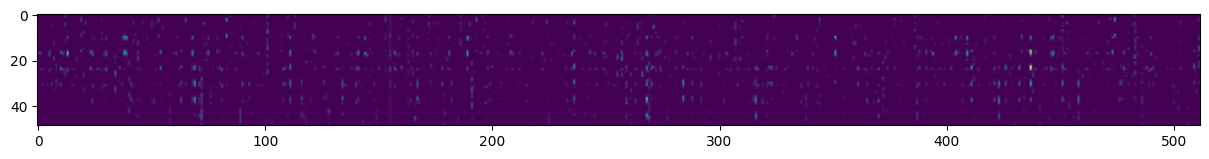

In [218]:
vgg = keras.applications.VGG16(include_top=False)

inp = keras.applications.vgg16.preprocess_input(x_sample[:1])
res = vgg(inp)
print(f"Shape after applying VGG-16: {res[0].shape}")
plt.figure(figsize=(15,3))
plt.imshow(res[0].numpy().reshape(-1,512))

Its a 3d feature tensor of 7x7x512, but is flattened to 2d so we can visualize it.

Let's see if we can us the features to classify images in 50 minibatches, and pre-compute their feature vectors. We can use TensorFlow **dataset** API to do that. `Map` function takes dataset and applies lambda-function to transform it. `ds_features_train`, and `ds_features_test` is used to construct a new dataset, containing VGG-extracted features instead of original images.

In [219]:
num = batch_size*25
ds_features_train = ds_train.take(25).map(lambda x,y : (vgg(x),y))
ds_features_test = ds_test.take(10).map(lambda x,y : (vgg(x),y))

for x,y in ds_features_train:
    print(x.shape,y.shape)
    break

(32, 7, 7, 512) (32,)


With extracted features, we can train a simple dense classifier and distinguish between cats and dogs, taking the shape of (7,7,512). As it's a binary classification, we'll use `sigmoid` and `binary_crossentropy` loss.

In [220]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(7,7,512)),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(ds_features_train, validation_data=ds_features_test)

C:\Users\deanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 100s 4s/step - acc: 0.7504 - loss: 6.0899 - val_acc: 0.9156 - val_loss: 1.6848


Model does great despite simplicity, with 91% accuracy. Though we only tested a sub portion of it, since manual feature extraction takes a lot of time.

### Transfer learning using one VGG network

We can avoid manual pre-computing features using VGG-16 network as a whole during training, simply by adding feature extractor to our network as a first layer.

VGG-16 can be used as a lyear in another neural network. Just need construction of network with a dense classifier on top of it, and train the whole network using back propagation.

In [221]:
model = keras.models.Sequential()
model.add(keras.applications.VGG16(include_top=False,input_shape=(224,224,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.layers[0].trainable = False

model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │        25,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Since VGG-16 acts as a layer, it also means the weights could be changed during training, which we don't want as it's already pre-trained. We can **freeze** the weights by setting the `trainable` property to `False`.

The above parameter numbers close to 15 million, but we are only training 25k parameters due to the 'freezing' of vgg16. This allows fine-tuning smaller number of parameters with smaller number of examples.

In [222]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(ds_train.take(50), validation_data=ds_test.take(10))

50/50 ━━━━━━━━━━━━━━━━━━━━ 182s 4s/step - acc: 0.8117 - loss: 2.9519 - val_acc: 0.9563 - val_loss: 0.6049


Hey, our model does pretty good with 95% accuracy!

## Tensors and variables

In [223]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf

Tensorflow Tensors are a data structure to hold input and outputs of a deep learning model. Tensorflow Variable is a tensor type to store model parameters that need to be learned while training.

Difference with tensors is it's `immutable`, and variables are `mutable`, aka whether they can be changed or not.

Vector = 1d, Matrix = 2d, Tensor = 3d and above.

If we want to create a 3 x 2 matrix in TensorFlow: 

[1 2]

[3 4]

[5 6]

In [227]:
X = tf.constant([[1, 2], [3, 4], [5, 6]])
X

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

`shape` = see how many dims and size of dims

`device` = whether tensor is stored in CPU or GPU

`dtype` = type of value it holds

`type` = check type of tensor itself

In [225]:
print(X.shape)
print(X.device)
print(X.dtype)
print(type(X))

(3, 2)
/job:localhost/replica:0/task:0/device:CPU:0
<dtype: 'int32'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


Tensorflow can be sliced and indexed like numpy ndarrays:

In [226]:
X = X[0:2, 0:1]
X

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[1],
       [3]], dtype=int32)>

Tensors are convertible to numpy arrays using the `numpy` function

In [228]:
array = X.numpy()           
array

array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)

In [232]:
V = tf.Variable(X)
V

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [235]:
Y = tf.constant([[7, 8], [9, 10], [11, 12]]) 
V.assign(Y)
V

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10],
       [11, 12]], dtype=int32)>

In [238]:
V[1].assign([10, 20])

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=int32, numpy=
array([[ 7,  8],
       [10, 20],
       [11, 12]], dtype=int32)>

Training process somehow requires calculating derivatives that involve tensor.

In [ ]:
# Decimal points in tensor values ensure they are floats, which automatic differentiation requires.
U = tf.constant([[1., 2.]])
V = tf.constant([[3., 4.], [5., 6.]])

with tf.GradientTape(persistent=True) as tape:
  tape.watch(U)
  tape.watch(V)
  W = tf.matmul(U, V)
  f = tf.math.reduce_sum(W)

print(tape.gradient(f, U)) # df/dU
print(tape.gradient(f, V)) # df/dV

tf.Tensor([[ 7. 11.]], shape=(1, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [2. 2.]], shape=(2, 2), dtype=float32)


TensorFlow watches tensors defined as `variable`, so we'll turn U and V into variables and reove `watch` calls.

In [244]:
U = tf.Variable([[1., 2.]])  # Shape: (1, 2)
V = tf.Variable([[3., 4.],   # Shape: (2, 2)
                 [5., 6.]])

# Matrix multiplication:
with tf.GradientTape(persistent=True) as tape:
    W = tf.matmul(U, V)  # Shape: (1, 2)
    # => W = [[1*3 + 2*5, 1*4 + 2*6]] = [[13, 16]]

    f = tf.reduce_sum(W)  # f = 13 + 16 = 29.0

print(tape.gradient(f, U)) # df/dU
print(tape.gradient(f, V)) # df/dV

tf.Tensor([[ 7. 11.]], shape=(1, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [2. 2.]], shape=(2, 2), dtype=float32)


### So why is any of this important?

All this derivative or calculus stuff seems a bit pointless, when ML models do all of these things for us automatically. But it's also good to get a better understanding for more complex ML model stuff.

**Gradients (derivatives)** are the fuel for training - they tell the model how to change itself. It helps to know their existence, and how much the loss changes when the weight is also changed. Example: `When a model makes a really high loss (wrong prediction), the gradient tells the weights the problem, and how much they need to change to lower the loss`.

**Debugging training** as gradients may enter vanishing or exploding modes, or just never change. So you have the chance to try fix it

**Interpreting bias or stuck model** as some gradients may never pass to certain layers

**Research or building novel architectures** where you want to tweak how a gradient exactly behaves or flows



### What does the resulting df/dU and df/dV mean?

It comes down to the resulting mathematical operation for W: `W = [[1*3 + 2*5, 1*4 + 2*6]] = [[13, 16]]` So how do we actually get the derivatives of df/dU and df/dV?

So U = [1,2], to get the derivative for `1`, we pull the values that are multiplied by `1` > `1*3 + 1*4`. We then add the numbers that are multiplied with 1 > `3 + 4 = 7` which gets us the derivative

`2` > `2*5 + 2*6` > `5 + 6 = 11`

Then for V = [3,4][5,6] > derivative of `3` > `1*3` We only have `1`, so derivative is `1`

And so on for the rest of the values.

So what does the number in the derivative mean? The larger the number, the stronger the gradient is, meaning it has a stronger affect on the output, whilst vice versa for smaller numbers. So U's variable 2 has a gradient/derivative of 11, makes it a pretty influencial parameter, over someone like V's 3

What this means is, if you change U's 2, say nudging it by a value of 0.1, it raises `f` by 0.11 `11 * 0.01 = 0.11`, which changes how much the output gives out. Compared to V 3 of 0.01 `1 * 0.01 = 0.01`. Essentially shows how our variable U 2 has about 11 times greater power in changing the output of model compared to V 3.

Here's a structure of neural network defined using keras:

![alt text](download-2.png)

The same neural network, showing the `W` and `b` parameters you want to learn during training:

![alt text](download-3.png)

We have a composition of two layers. Our two layers are dense, with the first layer having `ReLU` attached to the `Dense`.

#### What is a Dense layer?

**Dense layer** - most basic building block of neural network which performs a simple mathematical operation:   $output = xW + b$

$x$ = input vector (can be your data or an output from a previous layer)

$W$ = weight matrix (trainable parameters)

$b$ = bias vector (trainable too)

Results are then passed through an activation function (ReLU, sigmoid, etc.)

**So what does this mean?**

Example, we are predicting house prices and you give the neural network some inputs:

`x = [size, number_of_rooms, age]`

Dense layer will: Multiply each input weight > Add then up along with bias > Apple activation function (ReLU, etc.) > Send result to next layer

`x = [1000, 3, 20]`

`W = [[0.01,], [0.5], [-0.2]]`

`b = [1.0]`

following $output = xW + b$ > $(1000 * 0.01) + (3 * 0.5) + (20 * -0.2) + 1.0$ > goes to > $10 + 1.5 - 4 + 1 = 8.5$

Then ReLU is like: $ReLU(x) = max(0,x)$ > gives > $Relu(8.5) = 8.5$

**So what is good about ReLU?**

Sure it gives the same values as dense, **but** only when it is positive. When it is negative, ReLU sets it to 0 because of `max(0,x)`

So ReLU(-4.2) = 0 Will make this neuron **inactive**, and doesn't contribute to the next layer.

What it does is create non-linearity in the model, essential for complex patterns. Does sparse activations. With outputs set to 0, it saves compuation and prevents overfitting. Lastly it simplifies gradients, input >0 is 1, and input <=0 is 0. Makes things faster and avoids vanishing gradients.

**Why this matters when not using Keras?**

It helps with undersatanding the internals, so you can customize layers, debug training, and experiment with new architectures or loss functions

In [245]:
class NeuralNetwork(tf.keras.Model):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    initializer = tf.keras.initializers.GlorotUniform()
    self.W1 = tf.Variable(initializer(shape=(784, 20)))
    self.b1 = tf.Variable(tf.zeros(shape=(20,)))
    self.W2 = tf.Variable(initializer(shape=(20, 10)))
    self.b2 = tf.Variable(tf.zeros(shape=(10,)))

  def call(self, x: tf.Tensor) -> tf.Tensor:
    x = tf.reshape(x, [-1, 784])
    x = tf.matmul(x, self.W1) + self.b1
    x = tf.nn.relu(x)
    x = tf.matmul(x, self.W2) + self.b2
    return x

Our goal for training neural network is finding $W$ and $b$, measuring the difference of actual and predicted labels. Optimization algorithms can help with finding $W$ and $b$, that minimize function.

$loss=ℓ(X,y,W,b)$ < loss equation that takes in: `X` (input data), `y` (true labels), `W` (weight of model), `b` (bias of model), `ℓ` (loss/inaccuracy)

It returns a number that tells us how far off the model's prediction is from actual truth

**Weights** (W), your knobs for controlling how strongly each input influences the output

**Biases** (b), the shift on the output of each neuron, like a default offset before activation

And our point of training, is to minimize the function: $ℓ(X,y,W,b)$ by computer how much each parameter (W, b) contribute to the loss (via gradients), then adjusting the parameters opposite direction of gradient.

**Gradient descent**

One of the simpler optimization algorithms to iteratively imporve the estimates of $W$ and $b$ to minimize our $ℓ$

What `gradient descent` does is measuring how much a changing parameter increases or decreases the loss, then nudging the parameter in the direction that lowers loss.

This is the equation rule for updating the `W` (weight) and `b` (bias), after obtaining the loss.

$$
W := W - \alpha \cdot \frac{\partial \ell}{\partial W}
$$

$$
b := b - \alpha \cdot \frac{\partial \ell}{\partial b}
$$

$W$ and $b$ = current model weight and bias

$\frac{\partial \ell}{\partial W}$ = The gradient: how much changing $W$ will do to loss's incerase/decrease

$∂$ = stating the amount of change when a value is nudged

$α$ = the learning rate: how much of a step you take for every update 

$:=$ = Updating the new value

**Steps**

1. Computing predictions and then loss
2. Compute gradients, see how much weight/bias affects loss
3. Upadate weight/bias based on loss, and strength of learning rate that reaches a lower loss

These sequence of looping steps with updating values is called *backpropagation*.

In [247]:
def fit_one_batch(X, y, model, loss_fn, optimizer) -> tuple[tf.Tensor, tf.Tensor]:
  with tf.GradientTape() as tape:
    y_prime = model(X, training=True)
    loss = loss_fn(y, y_prime)

  grads = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))

  return (y_prime, loss)

Code above does the backpropagation and retrieval of low loss if it can. Though this is made for a mini-batch size of 64, rather than the full dataset of 60k data points. To execute the backpropagation code on all items, we can use `for` loops or call the `fit_one_batch` function.

In [248]:
def fit(dataset: tf.data.Dataset, model: tf.keras.Model, loss_fn: tf.keras.losses.Loss, 
optimizer: tf.optimizers.Optimizer) -> None:
  loss_sum = 0
  correct_item_count = 0
  current_item_count = 0
  print_every = 100
  batch_loss = 0
  batch_index = 0

  for (X, y) in dataset:
    (y_prime, loss) = fit_one_batch(X, y, model, loss_fn, optimizer)

    y = tf.cast(y, tf.int64)
    correct_item_count += (tf.math.argmax(y_prime, axis=1) == y).numpy().sum()

    batch_loss = loss.numpy()
    loss_sum += batch_loss
    current_item_count += len(X)
    batch_index += 1

    if ((batch_index) % print_every == 0):
      batch_accuracy = correct_item_count / current_item_count * print_every
      print(f'[Batch {batch_index:>3d} - {current_item_count:>5d} items] accuracy: {batch_accuracy:>0.1f}%, loss: {batch_loss:>7f}')

  batch_accuracy = correct_item_count / current_item_count * print_every
  print(f'[Batch {batch_index:>3d} - {current_item_count:>5d} items] accuracy: {batch_accuracy:>0.1f}%, loss: {batch_loss:>7f}')

In [264]:
# Additional functions for Microsoft Learn Module
# Introduction to TensorFlow

import gzip
import numpy as np
import tensorflow as tf
from typing import Tuple


class NeuralNetwork(tf.keras.Model):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    initializer = tf.keras.initializers.GlorotUniform()
    self.W1 = tf.Variable(initializer(shape=(784, 20)))
    self.b1 = tf.Variable(tf.zeros(shape=(20,)))
    self.W2 = tf.Variable(initializer(shape=(20, 10)))
    self.b2 = tf.Variable(tf.zeros(shape=(10,)))

  def call(self, x: tf.Tensor) -> tf.Tensor:
    x = tf.reshape(x, [-1, 784])
    x = tf.matmul(x, self.W1) + self.b1
    x = tf.nn.relu(x)
    x = tf.matmul(x, self.W2) + self.b2
    return x  

def read_images(path: str, image_size: int, num_items: int) -> np.ndarray:
  with gzip.open(path, 'rb') as file:
    data = np.frombuffer(file.read(), np.uint8, offset=16)
    data = data.reshape(num_items, image_size, image_size)
  return data

def read_labels(path: str, num_items: int) -> np.ndarray:
  with gzip.open(path, 'rb') as file:
    data = np.frombuffer(file.read(num_items + 8), np.uint8, offset=8)
    data = data.astype(np.int64)
  return data

def get_data(batch_size: int) -> Tuple[tf.data.Dataset, tf.data.Dataset]:
  image_size = 28
  num_train = 60000
  num_test = 10000

  training_images = read_images('data/FashionMNIST/raw/train-images-idx3-ubyte.gz', image_size, num_train)
  test_images = read_images('data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz', image_size, num_test)
  training_labels = read_labels('data/FashionMNIST/raw/train-labels-idx1-ubyte.gz', num_train)
  test_labels = read_labels('data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz', num_test)

  (training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

  train_dataset = tf.data.Dataset.from_tensor_slices((training_images, training_labels))
  test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

  train_dataset = train_dataset.map(lambda image, label: (float(image) / 255.0, label))
  test_dataset = test_dataset.map(lambda image, label: (float(image) / 255.0, label))

  train_dataset = train_dataset.batch(batch_size).shuffle(500)
  test_dataset = test_dataset.batch(batch_size).shuffle(500)

  return (train_dataset, test_dataset)


labels_map = {
  0: 'T-Shirt',
  1: 'Trouser',
  2: 'Pullover',
  3: 'Dress',
  4: 'Coat',
  5: 'Sandal',
  6: 'Shirt',
  7: 'Sneaker',
  8: 'Bag',
  9: 'Ankle Boot',
}

Complete iteration over a mini batch will be an `epoch`. Real world projects want to set epochs as high as possible to achieve better predictions.

In [265]:
learning_rate = 0.1
batch_size = 64
epochs = 5

(train_dataset, test_dataset) = get_data(batch_size)

model = NeuralNetwork()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.optimizers.SGD(learning_rate)

print('\nFitting:')
for epoch in range(epochs):
  print(f'\nEpoch {epoch + 1}\n-------------------------------')
  fit(train_dataset, model, loss_fn, optimizer)

FileNotFoundError: [Errno 2] No such file or directory: 'data/FashionMNIST/raw/train-images-idx3-ubyte.gz'

In [266]:
@tf.function
def fit_one_batch(X: tf.Tensor, y: tf.Tensor, model: tf.keras.Model, loss_fn: tf.keras.losses.Loss, 
optimizer: tf.keras.optimizers.Optimizer) -> Tuple[tf.Tensor, tf.Tensor]:
  with tf.GradientTape() as tape:
    y_prime = model(X, training=True)
    loss = loss_fn(y, y_prime)

  grads = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))

  return (y_prime, loss)


def fit(dataset: tf.data.Dataset, model: tf.keras.Model, loss_fn: tf.keras.losses.Loss, 
optimizer: tf.optimizers.Optimizer) -> None:
  loss_sum = 0
  correct_item_count = 0
  current_item_count = 0
  print_every = 100
  batch_loss = 0
  batch_index = 0

  for (X, y) in dataset:
    (y_prime, loss) = fit_one_batch(X, y, model, loss_fn, optimizer)

    y = tf.cast(y, tf.int64)
    correct_item_count += (tf.math.argmax(y_prime, axis=1) == y).numpy().sum()

    batch_loss = loss.numpy()
    loss_sum += batch_loss
    current_item_count += len(X)
    batch_index += 1

    if ((batch_index) % print_every == 0):
      batch_accuracy = correct_item_count / current_item_count * print_every
      print(f'[Batch {batch_index:>3d} - {current_item_count:>5d} items] accuracy: {batch_accuracy:>0.1f}%, loss: {batch_loss:>7f}')

  batch_accuracy = correct_item_count / current_item_count * print_every
  print(f'[Batch {batch_index:>3d} - {current_item_count:>5d} items] accuracy: {batch_accuracy:>0.1f}%, loss: {batch_loss:>7f}')


learning_rate = 0.1
batch_size = 64
epochs = 5

(train_dataset, test_dataset) = get_data(batch_size)

model = NeuralNetwork()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.optimizers.SGD(learning_rate)

print('\nFitting:')
for epoch in range(epochs):
  print(f'\nEpoch {epoch + 1}\n-------------------------------')
  fit(train_dataset, model, loss_fn, optimizer)
print(f'\nTime per epoch: {t_elapsed / epochs :>.3f} sec' )

FileNotFoundError: [Errno 2] No such file or directory: 'data/FashionMNIST/raw/train-images-idx3-ubyte.gz'

In [267]:
@tf.function
def evaluate_one_batch(X: tf.Tensor, y: tf.Tensor, model: tf.keras.Model, 
loss_fn: tf.keras.losses.Loss) -> Tuple[tf.Tensor, tf.Tensor]:
  y_prime = model(X, training=False)
  loss = loss_fn(y, y_prime)

  return (y_prime, loss)

In [268]:
def evaluate(dataset: tf.data.Dataset, model: tf.keras.Model, 
loss_fn: tf.keras.losses.Loss) -> Tuple[float, float]:
  batch_count = 0
  loss_sum = 0
  correct_item_count = 0
  current_item_count = 0

  for (X, y) in dataset:
    (y_prime, loss) = evaluate_one_batch(X, y, model, loss_fn)

    correct_item_count += (tf.math.argmax(y_prime, axis=1).numpy() == y.numpy()).sum()
    loss_sum += loss.numpy()
    current_item_count += len(X)
    batch_count += 1

  average_loss = loss_sum / batch_count
  accuracy = correct_item_count / current_item_count
  return (average_loss, accuracy)

In [269]:
print('\nEvaluating:')
(test_loss, test_accuracy) = evaluate(test_dataset, model, loss_fn)
print(f'Test accuracy: {test_accuracy * 100:>0.1f}%, test loss: {test_loss:>8f}')

model.save_weights('outputs/weights')


Evaluating:
Test accuracy: 17.5%, test loss: 2.375371


ValueError: The filename must end in `.weights.h5`. Received: filepath=outputs/weights

We will do one forward pass through, and get a prediction. Here, we won't need loss function as we aren't evaluating performance right now, but the model prediction. We will use `softmax` to convert predicted values to between 0 and 1, then use `argmax` to extract the category that the model predict has the highest probability of being.

we can add `@tf.function` decorator to get performance benefits of graph execution

In [270]:
@tf.function
def predict(model: tf.keras.Model, X: np.ndarray) -> tf.Tensor:
  y_prime = model(X, training=False)
  probabilities = tf.nn.softmax(y_prime, axis=1)
  predicted_indices = tf.math.argmax(input=probabilities, axis=1)
  return predicted_indices

In [271]:
model = NeuralNetwork()
model.load_weights('outputs/weights')

url = 'https://raw.githubusercontent.com/MicrosoftDocs/tensorflow-learning-path/main/intro-keras/predict-image.png'

with Image.open(requests.get(url, stream=True).raw) as image:
  X = np.asarray(image, dtype=np.float32).reshape((-1, 28, 28)) / 255.0

plt.figure()
plt.axis('off')
plt.imshow(X.squeeze(), cmap='gray')
plt.show()

ValueError: File format not supported: filepath=outputs/weights. Keras 3 only supports V3 `.keras` and `.weights.h5` files, or legacy V1/V2 `.h5` files.

In [272]:
predicted_index = predict(model, X).numpy()[0]
predicted_name = labels_map[predicted_index]

print(f'Predicted class: {predicted_name}')

ValueError: in user code:

    File "C:\Users\deanc\AppData\Local\Temp\ipykernel_39068\286083202.py", line 3, in predict  *
        y_prime = model(X, training=False)
    File "C:\Users\deanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\deanc\AppData\Local\Temp\ipykernel_39068\3638405648.py", line 20, in call
        x = tf.reshape(x, [-1, 784])

    ValueError: Exception encountered when calling NeuralNetwork.call().
    
    [1mDimension size must be evenly divisible by 784 but is 6 for '{{node neural_network_16_1/Reshape}} = Reshape[T=DT_INT32, Tshape=DT_INT32](X, neural_network_16_1/Reshape/shape)' with input shapes: [3,2], [2] and with input tensors computed as partial shapes: input[1] = [?,784].[0m
    
    Arguments received by NeuralNetwork.call():
      • x=tf.Tensor(shape=(3, 2), dtype=int32)


In [274]:
import gzip
import numpy as np
import tensorflow as tf
from typing import Tuple
import time
import requests
from PIL import Image


class NeuralNetwork(tf.keras.Model):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    initializer = tf.keras.initializers.GlorotUniform()
    self.W1 = tf.Variable(initializer(shape=(784, 20)))
    self.b1 = tf.Variable(tf.zeros(shape=(20,)))
    self.W2 = tf.Variable(initializer(shape=(20, 10)))
    self.b2 = tf.Variable(tf.zeros(shape=(10,)))

  def call(self, x: tf.Tensor) -> tf.Tensor:
    x = tf.reshape(x, [-1, 784])
    x = tf.matmul(x, self.W1) + self.b1
    x = tf.nn.relu(x)
    x = tf.matmul(x, self.W2) + self.b2
    return x


labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
  }


def read_images(path: str, image_size: int, num_items: int) -> np.ndarray:
  with gzip.open(path, 'rb') as file:
    data = np.frombuffer(file.read(), np.uint8, offset=16)
    data = data.reshape(num_items, image_size, image_size)
  return data


def read_labels(path: str, num_items: int) -> np.ndarray:
  with gzip.open(path, 'rb') as file:
    data = np.frombuffer(file.read(num_items + 8), np.uint8, offset=8)
    data = data.astype(np.int64)
  return data


def get_data(batch_size: int) -> Tuple[tf.data.Dataset, tf.data.Dataset]:
  image_size = 28
  num_train = 60000
  num_test = 10000
  
  (training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

  train_dataset = tf.data.Dataset.from_tensor_slices((training_images, training_labels))
  test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

  train_dataset = train_dataset.map(lambda image, label: (float(image) / 255.0, label))
  test_dataset = test_dataset.map(lambda image, label: (float(image) / 255.0, label))

  train_dataset = train_dataset.batch(batch_size).shuffle(500)
  test_dataset = test_dataset.batch(batch_size).shuffle(500)

  return (train_dataset, test_dataset)


@tf.function
def fit_one_batch(X: tf.Tensor, y: tf.Tensor, model: tf.keras.Model, loss_fn: tf.keras.losses.Loss, 
optimizer: tf.keras.optimizers.Optimizer) -> Tuple[tf.Tensor, tf.Tensor]:
  with tf.GradientTape() as tape:
    y_prime = model(X, training=True)
    loss = loss_fn(y, y_prime)

  grads = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))

  return (y_prime, loss)


def fit(dataset: tf.data.Dataset, model: tf.keras.Model, loss_fn: tf.keras.losses.Loss, 
optimizer: tf.optimizers.Optimizer) -> None:
  loss_sum = 0
  correct_item_count = 0
  current_item_count = 0
  print_every = 100
  batch_loss = 0
  batch_index = 0

  for (X, y) in dataset:
    (y_prime, loss) = fit_one_batch(X, y, model, loss_fn, optimizer)

    y = tf.cast(y, tf.int64)
    correct_item_count += (tf.math.argmax(y_prime, axis=1) == y).numpy().sum()

    batch_loss = loss.numpy()
    loss_sum += batch_loss
    current_item_count += len(X)
    batch_index += 1

    if ((batch_index) % print_every == 0):
      batch_accuracy = correct_item_count / current_item_count * print_every
      print(f'[Batch {batch_index:>3d} - {current_item_count:>5d} items] accuracy: {batch_accuracy:>0.1f}%, loss: {batch_loss:>7f}')

  batch_accuracy = correct_item_count / current_item_count * print_every
  print(f'[Batch {batch_index:>3d} - {current_item_count:>5d} items] accuracy: {batch_accuracy:>0.1f}%, loss: {batch_loss:>7f}')


@tf.function
def evaluate_one_batch(X: tf.Tensor, y: tf.Tensor, model: tf.keras.Model, 
loss_fn: tf.keras.losses.Loss) -> Tuple[tf.Tensor, tf.Tensor]:
  y_prime = model(X, training=False)
  loss = loss_fn(y, y_prime)

  return (y_prime, loss)


def evaluate(dataset: tf.data.Dataset, model: tf.keras.Model, 
loss_fn: tf.keras.losses.Loss) -> Tuple[float, float]:
  batch_count = 0
  loss_sum = 0
  correct_item_count = 0
  current_item_count = 0

  for (X, y) in dataset:
    (y_prime, loss) = evaluate_one_batch(X, y, model, loss_fn)

    correct_item_count += (tf.math.argmax(y_prime, axis=1).numpy() == y.numpy()).sum()
    loss_sum += loss.numpy()
    current_item_count += len(X)
    batch_count += 1

  average_loss = loss_sum / batch_count
  accuracy = correct_item_count / current_item_count
  return (average_loss, accuracy)


def training_phase():
  learning_rate = 0.1
  batch_size = 64
  epochs = 5

  (train_dataset, test_dataset) = get_data(batch_size)

  model = NeuralNetwork()

  loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
  optimizer = tf.optimizers.SGD(learning_rate)

  print('\nFitting:')
  t_begin = time.time()
  for epoch in range(epochs):
    print(f'\nEpoch {epoch + 1}\n-------------------------------')
    fit(train_dataset, model, loss_fn, optimizer)
  t_elapsed = time.time() - t_begin
  print(f'\nTime per epoch: {t_elapsed / epochs :>.3f} sec' )

  print('\nEvaluating:')
  (test_loss, test_accuracy) = evaluate(test_dataset, model, loss_fn)
  print(f'Test accuracy: {test_accuracy * 100:>0.1f}%, test loss: {test_loss:>8f}')

  model.save_weights('outputs/weights')


@tf.function
def predict(model: tf.keras.Model, X: np.ndarray) -> tf.Tensor:
  y_prime = model(X, training=False)
  probabilities = tf.keras.layers.Softmax(axis=1)(y_prime)
  predicted_indices = tf.math.argmax(input=probabilities, axis=1)
  return predicted_indices


def inference_phase():
  print('\nPredicting:')

  model = NeuralNetwork()
  model.load_weights('outputs/weights')

  url = 'https://raw.githubusercontent.com/MicrosoftDocs/tensorflow-learning-path/main/intro-keras/predict-image.png'

  with Image.open(requests.get(url, stream=True).raw) as image:
    X = np.asarray(image, dtype=np.float32).reshape((-1, 28, 28)) / 255.0

  predicted_vector = model.predict(X)
  predicted_index = np.argmax(predicted_vector)
  predicted_name = labels_map[predicted_index]

  print(f'Predicted class: {predicted_name}')


training_phase()
inference_phase()



Fitting:

Epoch 1
-------------------------------


ValueError: in user code:

    File "C:\Users\deanc\AppData\Local\Temp\ipykernel_39068\3483489529.py", line 82, in fit_one_batch  *
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    File "C:\Users\deanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\optimizers\base_optimizer.py", line 382, in apply_gradients  **
        grads, trainable_variables = zip(*grads_and_vars)

    ValueError: not enough values to unpack (expected 2, got 0)


## Layers in a CNN

Convolutional Neural networks > consists of multiple layers, each performing a specific task in extracting features or predicting labels.

### Convolutional layers

A principal/main layer that extracts important features in images. They work by applying a filter to images, which is defined by kernel, consisting of a matrix with weight values.

An example of a 3x3 filter:

```python
 1 -1  1
-1  0 -1
 1 -1  1
```

An image is a matrix with pixel values. You apply the filter by `overlaying` it on an image, then calculated a weighted sum of the corresponding image pixel. Result is assigned to the centre cell of the equivalent to a 3x3 square. Let's say we have a 6x6 image with the pixel values:

```python
255 255 255 255 255 255 
255 255 100 255 255 255
255 100 100 100 255 255
100 100 100 100 100 255
255 255 255 255 255 255
255 255 255 255 255 255
```

Applying the filter to the top left 3x3 area of image would look like this:

```python
255 255 255      1  -1   1    (255 x 1)+(255 x -1)+(255 x 1) +
255 255 100  x  -1   0  -1  = (255 x -1)+(255 x 0)+(100 x -1) +   = 155
255 100 100      1  -1   1    (255 x1 )+(100 x -1)+(100 x 1)
```

The result is assigned to the centre pixel of 3x3 area:

```python
 ?   ?   ?   ?   ?   ?  
 ?  155  ?   ?   ?   ?
 ?   ?   ?   ?   ?   ?
 ?   ?   ?   ?   ?   ?
 ?   ?   ?   ?   ?   ?
 ?   ?   ?   ?   ?   ?
```

Then we do it for the next 3x3 square to the right of it:

```python
255 255 255      1  -1   1    (255 x 1)+(255 x -1)+(255 x 1) +
255 100 255  x  -1   0  -1  = (255 x -1)+(100 x 0)+(255 x -1) +   = -155
100 100 100      1  -1   1    (100 x1 )+(100 x -1)+(100 x 1)

 ?   ?   ?   ?   ?   ?  
 ?  155 -155 ?   ?   ?
 ?   ?   ?   ?   ?   ?
 ?   ?   ?   ?   ?   ?
 ?   ?   ?   ?   ?   ?
 ?   ?   ?   ?   ?   ?
```

And now the resuting values will look like this, when applying the 3x3 area:

```python
?   ?   ?    ?    ?   ?
?  155 -155 155 -155  ?
? -155 310 -155  155  ?
?  310 155  310   0   ?
? -155 -155 -155  0   ?
?   ?   ?    ?    ?   ?
```

We don't have the ability to calculate edge pixels, as it won't match the needed 3x3 area. So these are defaulted to 0:

```python
0   0   0    0    0   0
0  155 -155 155 -155  0
0 -155 310 -155  155  0
0  310 155  310   0   0
0 -155 -155 -155  0   0
0   0   0    0    0   0
```

And if we pass the output into an activation function, such as `ReLU`, the negative values will be set to 0 to keep in line with it's non-linearity:

```python
0   0   0    0    0   0
0  155  0   155   0   0
0   0  310   0   155  0
0  310 155  310   0   0
0   0   0    0    0   0
0   0   0    0    0   0
```

Result is a *feature map* of *feature values* that can be used to train ML models. It's possible for the feature map to achieve >255 in values, so there's a need to normalize it back to 0 and 255 to account for it.

![alt text](convolution.gif)

An animated version of what convolutional layer does. A filter that takes up a number of area is applied over the image, calculates the values based on what the filter has stated, centre the value at the centre of filter, then continue for all parts of the image.

These help emphasize key visual attributes of the image, in this cas, the feature map highlights the edges and corners of the triangle in the image.

### Pooling layers

Its used to reduce the numnber of feature values while retaining key differentiating features that have been extracted. Most common type is `max pooling`

A filter is applied to image, and only the maximum pixel value in that filter area will be retained. Say if it's a 2x2 pooling kernel:

```python
0   0
0  155
```

The value of 155 is kept in this filter area. This also helps in reducing the number of feature values from 4 to 1, making training more efficient.

![alt text](pooling.gif)

Compared to convolutional layer, the pooling layer is applied to the entirety of the image. 

### Dropping layers

A challenge with CNN or any ML model is overfitting, where the model learns pattern from training data that doesn't exist, which doesn't translate well on test data. Accuracy of training may be 99%, but test may get 75%. These are noticed when test accuracy drops, but training accuracy increases.

`Dropping layers` mitigate the issue by randomly eliminating certain feature maps. It makes the model less over dependant on specific nodes, and help generalize predictions more easily. Other techniques to help overfitting is flippping, mirroring, or skewing training images, generating a variety of data for the model to learn, as it changes from epoch to epoch.

### Flattening layers

Post convolutional and pooling layers for extracting features, the results are often multi-dimensional. Flattening is used to flatten deature maps into a 2D vector of values, which can be used as input for a fully connected Dense layer.

### Fully connected layers

A CNN usually ends with a fully connected network, where the feature values are passed in as input layer, through one or more hidden layers, and generate values in an output layer.

Here is a basic CNN architevture:

![alt text](convolutional-neural-network.png)

